In [28]:
from IPython.display import display,HTML
import numpy as np #선형대수
import pandas as pd #자료구조,전처리,분석기능
import scipy as sp #과학계산용 - 최적화(optimizetion)
import scipy.stats as stats

import statsmodels.api as sm #추정, 검정 - 시계열
import statsmodels.formula as smf
from statsmodels.formula.api import ols #R처럼 사용할 수 있도록

import pylab
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

from sklearn.datasets import load_boston #data로딩
from sklearn.metrics import mean_squared_error, r2_score #r2설명력
from sklearn.metrics import mean_absolute_error
import seaborn as sns #그래픽출력 - 회귀분석용 그래프, 상관분석용 그래프, 시계열분석 그래프, 분포

import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.font_manager as fm

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

plt.rc('font',family='Malgun Gothic')

In [2]:
boston = load_boston()
print(boston.DESCR) #디스크립션 - 해당 데이터의 설명

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#사이키트 에서 로딩되는 데이터는 patch라는 독특한 구조로 되어있다.
#데이터의 종속변수(target)와 독립변수의 데이터가 있다.
#필드이름 = feature_names
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [4]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
data = pd.concat([x,y], axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#sns.pairplot(data)
#plt.show()

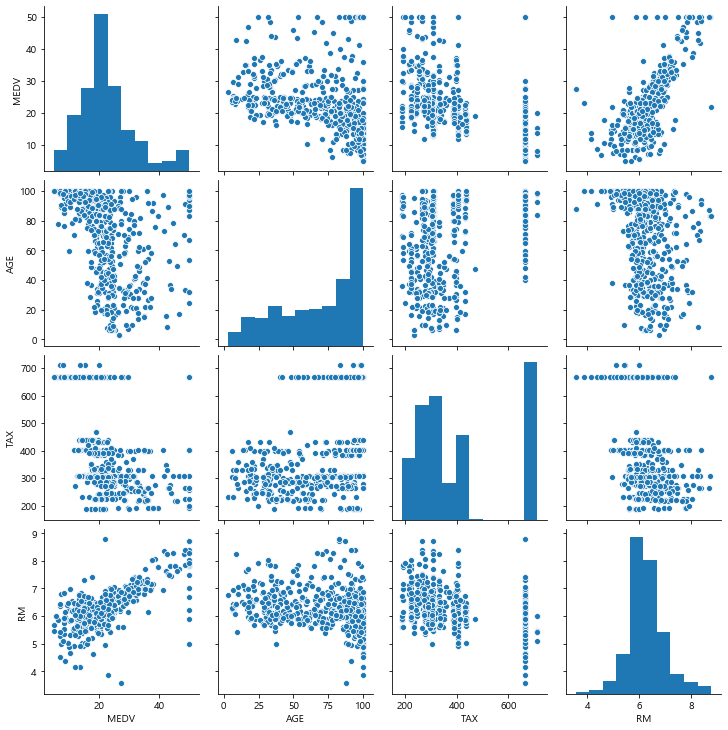

In [8]:
sns.pairplot(data[['MEDV','AGE','TAX','RM']])
plt.show()

C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


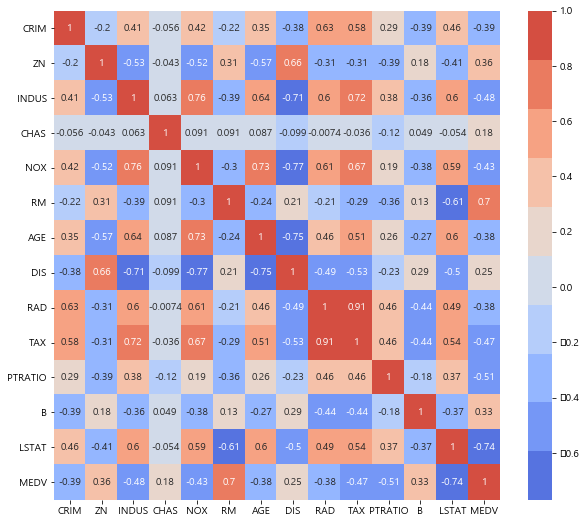

In [9]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),cmap=sns.color_palette('coolwarm',10), annot=data.corr()) #상관관계를 히트맵으로 처리해였다.

In [10]:
lm = sm.OLS(data['MEDV'],data.drop(['MEDV'],axis=1))
#target, 독립변수 순으로 넣어준다.
lm_trained = lm.fit()

In [11]:
display(lm_trained.summary())
#Prob (F-statistic):	0.00 모델이 유의미하다.
#Prob(Omnibus):	0.000 정규성을 띈다.
#Durbin-Watson:	0.999 - 자기상관성이 있다. (2일떄는 자기상관성이 없다.)
#Prob(JB) 왜도와첨도를 이용해 만들어진 정규성검정 - 정규성을 띈다.
#AIC:	3074. 비교대상이 있을때 사용(다른모델과의 복잡성 비교) & BIC
#P>|t| 독립변수가 종속변수와 유의마한지 - 0.05보다 작은경우 유의미하다.
#coef - 각 독립변수의 계수
#Kurtosis:	10.404 - 기준값 3
#Skew:	1.609 좌우가 대칭이냐?

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 28 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:23:00   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

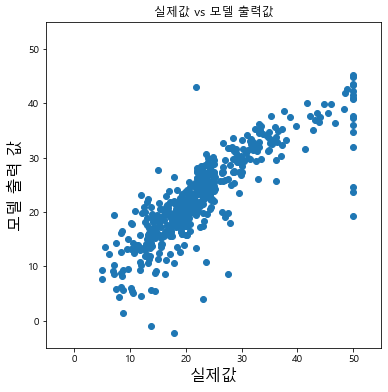

In [12]:
plt.figure(figsize=(6,6))
plt.title('실제값 vs 모델 출력값')
plt.scatter(y,lm_trained.fittedvalues) #실제값, 피팅된값
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값',size=16)
plt.xlim(-5,55)
plt.ylim(-5,55)
plt.show()
#실제와 예측값이 잔차가 없으려면 일직선으로 출력되어야한다.

In [13]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true-y_pred)/y_true)*100
#실제값과 예측값의 차이의 절대값 / 실제값 = MAPE

In [14]:
print(mean_squared_error(y,lm_trained.fittedvalues)) #MSE - 1/n simga((실제값-예측값)^2) 부호떄문에 제곱
print(np.sqrt(mean_squared_error(y,lm_trained.fittedvalues))) #RMSE - 루트를 씌어줌
# $\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$
print(mean_absolute_error(y,lm_trained.fittedvalues)) #MAE - 절대값
print(mean_absolute_percentage_error(y,lm_trained.fittedvalues)) #MAPE
print(np.corrcoef(data['MEDV'].values.flatten(), lm_trained.fittedvalues)) #상관계수 - 84%
#flatten() - 차원축소

24.166099330126496
4.915902697381886
3.2867335789615604
48.98667383478845
[[1.         0.84507527]
 [0.84507527 1.        ]]


In [15]:
from sklearn.datasets import fetch_california_housing

In [16]:
california = fetch_california_housing()
print(california.DESCR)
x = pd.DataFrame(california.data, columns = california.feature_names)
y = pd.DataFrame(california.target, columns= ['House Value']) #타겟에 데이터가 들어있기 때문에 별도로 빼주는 것이다.
data = pd.concat([x,y], axis=1)
data.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
#캘리포니아 집값분석 - 종속변수
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.3, random_state=55) #7:3비율로 나누게된다.
#model_selection 
#- splitter(데이터분리)
#- hyper parameter optimiaers(노가다방지, GridSearchCV) - parameter조합, grid 가로세로 나누어진 표
        #파라메터 조합을 만들어 좋은 조합을 찾게된다.
#- model validation(cross_validate, cross_val_score 등) - 데이터를 3개로 나눈다.(train, validation, test)
train_data.head()
#훈련에 참여하지 않은 데이터로 테스트 하기 위해서 데이터를 나누는 것이다.
#일반화 확인을 하기 위해서

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
2985,1.5429,42.0,5.258216,1.197183,677.0,3.178404,35.33,-119.01,0.394
2706,4.1293,3.0,5.221154,1.016026,1005.0,3.221154,32.87,-115.60,0.832
3583,2.8727,25.0,4.365347,1.007921,4579.0,4.533663,34.23,-118.55,2.451
10388,8.1611,4.0,8.394872,0.982051,1312.0,3.364103,33.59,-117.64,3.480
12509,4.0417,52.0,6.452830,1.047170,1301.0,2.454717,38.56,-121.45,1.738


In [18]:
lm = sm.OLS(train_data['House Value'], train_data.drop(['House Value'], axis=1))
lm_trained = lm.fit()

In [19]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          1.518e+04
Date:                Tue, 28 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:23:01   Log-Likelihood:                         -16764.
No. Observations:               14448   AIC:                                  3.354e+04
Df Residuals:                   14440   BIC:                                  3.360e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5216      0.005    101.582      0.000       0.512       0.532
HouseAge       0.0160      0.001     29.157      0.000       0.015       0.017
AveRooms      -0.1942      0.007    -25.898      0.000      -0.209      -0.179
AveBedrms      0.9733      0.038     25.292      0.000       0.898       1.049
Population  8.374e-06   6.08e-06      1.378      0.168   -3.54e-06    2.03e-05
AveOccup      -0.0042      0.001     -7.977      0.000      -0.005      -0.003
Latitude      -0.0635      0.004    -14.866      0.000      -0.072      -0.055
Longitude     -0.0154      0.001    -11.287      0.000      -0.018      -0.013
==============================================================================
Omnibus:                     2765.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7706.804
Skew:                           1.020   Prob(JB):                         0.00
Kurtosis:                       5.939   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
train_pred = lm_trained.predict(train_data.drop(['House Value'], axis=1))
#독립변수값 들을 입력하여 예측값을 얻는다.

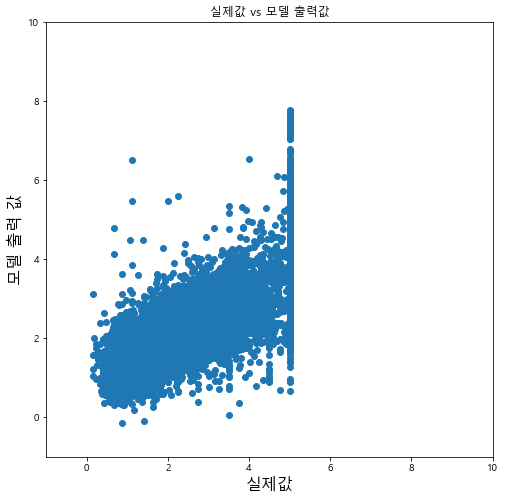

In [21]:
plt.figure(figsize=(8,8)) #표의 사이즈
plt.title('실제값 vs 모델 출력값')
plt.scatter(train_data['House Value'],train_pred) #실제값, 피팅된값
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값',size=16)
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.show()

In [22]:
#MSE, RMSE, MAE, MAPE를 찍어 봐라
#MAPE는 사이키트가 지원하지 않는다.
print('trainning MSE:{:03f}'.format(mean_squared_error(train_data['House Value'],train_pred)))
print(mean_squared_error(train_data['House Value'],train_pred)) #MSE - 1/n simga((실제값-예측값)^2) 부호떄문에 제곱
print(np.sqrt(mean_squared_error(train_data['House Value'],train_pred))) #RMSE - 루트를 씌어줌
print(mean_absolute_error(train_data['House Value'],train_pred)) #MAE - 절대값
print(mean_absolute_percentage_error(train_data['House Value'],train_pred)) #MAPE - 함수생성하여 계산해야한다.

trainning MSE:0.596140
0.596140043675572
0.7721010579422697
0.5707288267994235
34.74541777883725


In [23]:
print(np.corrcoef(train_data['House Value'].values.flatten(), train_pred)) #상관계수 74.2%

[[1.         0.74269013]
 [0.74269013 1.        ]]


C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


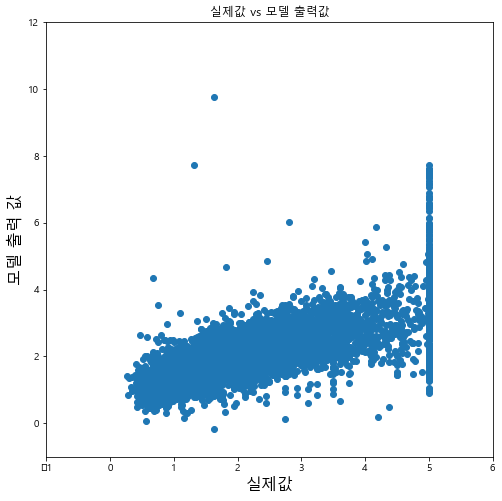

In [24]:
train_pred2 = lm_trained.predict(test_data.drop(['House Value'], axis=1))
#독립변수값 들을 입력하여 예측값을 얻는다.
plt.figure(figsize=(8,8)) #표의 사이즈
plt.title('실제값 vs 모델 출력값')
plt.scatter(test_data['House Value'],train_pred2) #실제값, 피팅된값
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값',size=16)
plt.xlim(-1,6)
plt.ylim(-1,12)
plt.show()

In [25]:
print('trainning MSE:{:03f}'.format(mean_squared_error(test_data['House Value'],train_pred2)))
print(mean_squared_error(test_data['House Value'],train_pred2)) #MSE 
print(np.sqrt(mean_squared_error(test_data['House Value'],train_pred2))) #RMSE - 루트를 씌어줌
print(mean_absolute_error(test_data['House Value'],train_pred2)) #MAE - 절대값
print(mean_absolute_percentage_error(test_data['House Value'],train_pred2)) #MAPE - 함수생성하여 계산해야한다.
print(np.corrcoef(test_data['House Value'].values.flatten(), train_pred2)) #상관계수 72.9%

trainning MSE:0.625885
0.6258848550550261
0.79112884857969
0.5738566331291006
34.261494115051455
[[1.         0.72934837]
 [0.72934837 1.        ]]


In [26]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          1.518e+04
Date:                Tue, 28 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:23:01   Log-Likelihood:                         -16764.
No. Observations:               14448   AIC:                                  3.354e+04
Df Residuals:                   14440   BIC:                                  3.360e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5216      0.005    101.582      0.000       0.512       0.532
HouseAge       0.0160      0.001     29.157      0.000       0.015       0.017
AveRooms      -0.1942      0.007    -25.898      0.000      -0.209      -0.179
AveBedrms      0.9733      0.038     25.292      0.000       0.898       1.049
Population  8.374e-06   6.08e-06      1.378      0.168   -3.54e-06    2.03e-05
AveOccup      -0.0042      0.001     -7.977      0.000      -0.005      -0.003
Latitude      -0.0635      0.004    -14.866      0.000      -0.072      -0.055
Longitude     -0.0154      0.001    -11.287      0.000      -0.018      -0.013
==============================================================================
Omnibus:                     2765.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7706.804
Skew:                           1.020   Prob(JB):                         0.00
Kurtosis:                       5.939   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#독립변수의 t분포값이 0.05를 초과하는 population을 제거하여 다시 모델링 해본다.
california = fetch_california_housing()
print(california.DESCR)

x = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['House Value'])
data = pd.concat([x,y], axis=1)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=20)

#모델링
lm = sm.OLS(train_data['House Value'], train_data.drop(['House Value'], axis=1))
lm_trained = lm.fit()
display(lm_trained.summary())
test_pred = lm_trained.predict(test_data.drop(['House Value'],axis=1))


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.507e+04
Date:                Tue, 28 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:42:14   Log-Likelihood:                         -16819.
No. Observations:               14448   AIC:                                  3.365e+04
Df Residuals:                   14440   BIC:                                  3.371e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5132      0.005    100.466      0.000       0.503       0.523
HouseAge       0.0155      0.001     28.003      0.000       0.014       0.017
AveRooms      -0.1967      0.008    -26.215      0.000      -0.211      -0.182
AveBedrms      0.8697      0.035     24.898      0.000       0.801       0.938
Population  3.938e-06   6.21e-06      0.634      0.526   -8.23e-06    1.61e-05
AveOccup      -0.0041      0.001     -7.882      0.000      -0.005      -0.003
Latitude      -0.0638      0.004    -14.857      0.000      -0.072      -0.055
Longitude     -0.0170      0.001    -12.531      0.000      -0.020      -0.014
==============================================================================
Omnibus:                     2955.526   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8011.427
Skew:                           1.097   Prob(JB):                         0.00
Kurtosis:                       5.915   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
train_data_new = train_data.drop(['Population'],axis=1)
test_data_new = test_data.drop(['Population'],axis=1)
lm_new = sm.OLS(train_data_new['House Value'], train_data_new.drop(['House Value'], axis=1))
lm_new_trained = lm_new.fit()
display(lm_new_trained.summary())
test_new_pred = lm_new_trained.predict(test_data_new.drop(['House Value'],axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.722e+04
Date:                Tue, 28 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:43:26   Log-Likelihood:                         -16819.
No. Observations:               14448   AIC:                                  3.365e+04
Df Residuals:                   14441   BIC:                                  3.371e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5132      0.005    100.471      0.000       0.503       0.523
HouseAge       0.0154      0.001     29.365      0.000       0.014       0.016
AveRooms      -0.1970      0.007    -26.313      0.000      -0.212      -0.182
AveBedrms      0.8703      0.035     24.924      0.000       0.802       0.939
AveOccup      -0.0041      0.001     -7.857      0.000      -0.005      -0.003
Latitude      -0.0641      0.004    -15.083      0.000      -0.072      -0.056
Longitude     -0.0172      0.001    -12.999      0.000      -0.020      -0.015
==============================================================================
Omnibus:                     2947.828   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7983.226
Skew:                           1.094   Prob(JB):                         0.00
Kurtosis:                       5.910   Cond. No.                         712.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
test_mse = mean_squared_error(test_data['House Value'], test_pred)
test_rmse = np.sqrt(mean_squared_error(test_data['House Value'], test_pred))
test_mae = mean_absolute_error(test_data['House Value'], test_pred)
test_mape = mean_absolute_percentage_error(test_data['House Value'],test_pred)

#변수를 제거한 후의 테스트 데이터의 에러비교
test_mse_new = mean_squared_error(test_data_new['House Value'], test_new_pred)
test_rmse_new = np.sqrt(mean_squared_error(test_data_new['House Value'], test_new_pred))
test_mae_new = mean_absolute_error(test_data_new['House Value'], test_new_pred)
test_mape_new = mean_absolute_percentage_error(test_data_new['House Value'],test_new_pred)

In [45]:
print(mean_squared_error(test_data['House Value'], test_pred))
print(np.sqrt(mean_squared_error(test_data['House Value'], test_pred)))
print(mean_absolute_error(test_data['House Value'], test_pred))
print(mean_absolute_percentage_error(test_data['House Value'],test_pred))

print("-")
#변수를 제거한 후의 테스트 데이터의 에러비교
#population변수의 t분포의 p벨류가 유의미 하지 않아서 제거하였다.
print(mean_squared_error(test_data_new['House Value'], test_new_pred))
print(np.sqrt(mean_squared_error(test_data_new['House Value'], test_new_pred)))
print(mean_absolute_error(test_data_new['House Value'], test_new_pred))
print(mean_absolute_percentage_error(test_data_new['House Value'],test_new_pred))

#error가 증가하였다.

0.6161865669902253
0.7849755199942386
0.579863829437746
35.705620755540316
-
0.6163320129218616
0.7850681581377897
0.5799176005364853
35.710673382889816


In [ ]:
#boston데이터를 로딩하고 회귀분석한 다음 평가결과를 출력하시오
boston = load_boston()
print(boston.DESCR) #디스크립션 - 해당 데이터의 설명
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
data = pd.concat([x,y], axis=1)
data.head()
train_data, test_data = train_test_split(data, test_size=0.3, random_state=55)
lm = sm.OLS(train_data['MEDV'],train_data.drop(['MEDV'],axis=1))
lm_train = lm.fit()
test_pred = lm_train.predict(test_data.drop(['MEDV'], axis=1))

In [ ]:
plt.figure(figsize=(6,6))
plt.title('실제값 vs 모델 출력값')
plt.scatter(test_data['MEDV'],test_pred) #실제값, 피팅된값
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값',size=16)
plt.xlim(-5,55)
plt.ylim(-5,55)
plt.show()

In [ ]:
print('trainning MSE:{:03f}'.format(mean_squared_error(test_data['MEDV'],test_pred)))
print(mean_squared_error(test_data['MEDV'],test_pred)) #MSE 
print(np.sqrt(mean_squared_error(test_data['MEDV'],test_pred))) #RMSE - 루트를 씌어줌
print(mean_absolute_error(test_data['MEDV'],test_pred)) #MAE - 절대값
print(mean_absolute_percentage_error(test_data['MEDV'],test_pred)) #MAPE - 함수생성하여 계산해야한다.
print(np.corrcoef(test_data['MEDV'].values.flatten(), test_pred)) #상관계수 72.9%

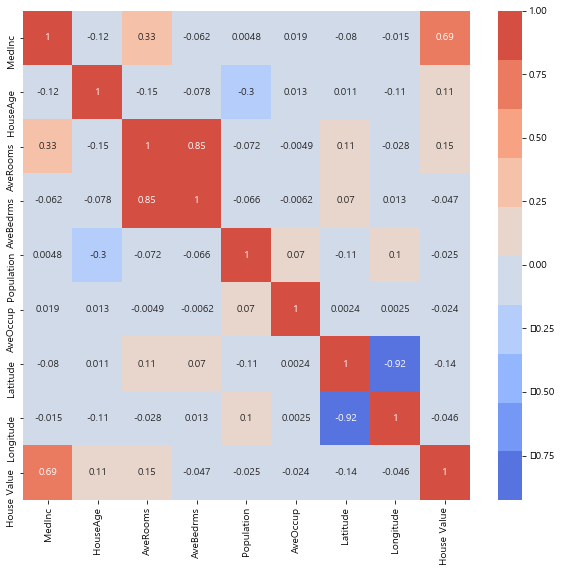

In [47]:
#상관계수 확인 pairplot(변수가많은경우는 확인이 어렵다.), heatmap(비교적깔끔)
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(), cmap=sns.color_palette('coolwarm',10),annot=data.corr())

In [50]:
#averooms, avebedrms 서로 상관성이 높다.
#변수간의 상관관계가 높으면 다중공산성이 있어서 종속변수에 영향을 미치므로 제거해주야한다.
train_data_new2 = train_data_new.drop('AveBedrms',axis=1)
test_data_new2 = test_data_new.drop('AveBedrms',axis=1)
lm_new2 = sm.OLS(train_data_new2['House Value'],train_data_new2.drop(['House Value'],axis=1))
lm_new2_trained = lm_new2.fit()
test_pred_new2 = lm_new2_trained.predict(test_data_new2.drop(['House Value'], axis=1))

print(mean_squared_error(test_data_new2['House Value'], test_pred_new2))
print(np.sqrt(mean_squared_error(test_data_new2['House Value'], test_pred_new2)))
print(mean_absolute_error(test_data_new2['House Value'], test_pred_new2))
print(mean_absolute_percentage_error(test_data_new2['House Value'],test_pred_new2))

0.6352065125936646
0.7969984395177099
0.5972219836561282
36.95497052814478


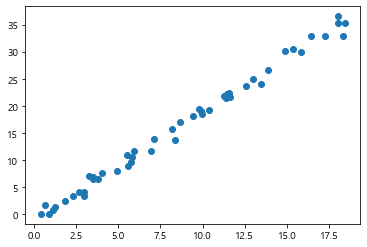

In [53]:
#올랐더라도 일반화에서는 유리하다(에러는 증가했어도 변수는 2개가 줄었는데도 대동소이하면 일반화에 유리하다.)
#여러경우의 어떤 데이터에도 도메인내의 어떤 데이터에도 잘 작동한다.
#변수2개를 고려하지 않아도 된다. - 좋은 변수는 늘이고 좋지 않은 변수를 줄여야한다.
#좋은변수 - 정직교하는 변수, 노이즈를 걸러낸 데이터 (PCA를 한 데이터)
#변수 + PCA 주성분을 추가 시키면 성능이 좋아질 수 있다.(accuracy증가)
#무조건 줄이는것이 좋은것은 아니다.

rng = np.random.RandomState(42)
x = 19 * rng.rand(50) 
y = 2 * x -1 + rng.randn(50)
plt.scatter(x,y)

In [56]:
x.shape

(50,)

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) #fit_intercept=True 상수항을 고려하라는 말
#규제가 없는 모델

In [59]:
X = x[:,np.newaxis]
X.shape

(50, 1)

In [60]:
model.fit(X,y) #기본적으로 선형회귀는 데이터를 안주면 복사한다.
# n_jobs=None - cpu core의 사용개수, normalize=False - 정규화

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
model.coef_ #기울기 , scikits에서는 모델학습결과에 _ 를 붙이는 경향이있다.

array([1.98824032])

In [63]:
model.intercept_ #절편

-0.903310725531119

In [64]:
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

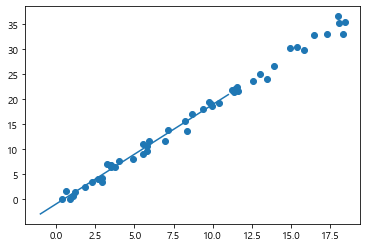

In [67]:
plt.scatter(x,y) #원래데이터
plt.plot(xfit, yfit) #예측데이터 plot=직선

In [70]:
#보스턴 데이터에 적용
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
boston = load_boston()
dfx = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
print(dfx.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [73]:
model_boston = LinearRegression().fit(dfx,dfy)
model_boston.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [74]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [76]:
model_boston.intercept_

array([36.45948839])

In [78]:
predictions = model_boston.predict(boston.data)
predictions - boston.target

array([[  6.00384338,   8.40384338,  -4.69615662, ...,   6.10384338,
          8.00384338,  18.10384338],
       [  1.02556238,   3.42556238,  -9.67443762, ...,   1.12556238,
          3.02556238,  13.12556238],
       [  6.56759672,   8.96759672,  -4.13240328, ...,   6.66759672,
          8.56759672,  18.66759672],
       ...,
       [  3.6274261 ,   6.0274261 ,  -7.0725739 , ...,   3.7274261 ,
          5.6274261 ,  15.7274261 ],
       [  2.12796681,   4.52796681,  -8.57203319, ...,   2.22796681,
          4.12796681,  14.22796681],
       [ -1.65578771,   0.74421229, -12.35578771, ...,  -1.55578771,
          0.34421229,  10.44421229]])

In [88]:
#유방암 데이터를 이용해서 분석
#데이터프레임으로 변환했었던 이유는 기본제공데이터가 patch포맷으로 되어있어서 sm.OLS는 데이터 프레임으로 변환이 필요
from sklearn.linear_model import Ridge
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#stratify - 데이터를 나눌때 종속변수를 고려해라(종속변수의 지율을 고려해서 train과test의 범주의 비율이 같도록 나눠라)
#종속변수가 범주형일때 사용된다.
#주요 고려사항이다.
ridge = Ridge(alpha=0.1).fit(X_train, Y_train)
#Ridge의 매개변수 alpha = 규제강도를 얘기한다.

In [89]:
print("훈련세트점수 : {:.2f}".format(ridge.score(X_train, Y_train)))

훈련세트점수 : 0.77


In [90]:
print("테스트세트점수 : {:.2f}".format(ridge.score(X_test, Y_test)))
#accuracy = 74 이라는 말이다.

테스트세트점수 : 0.74


In [97]:
from sklearn.linear_model import Lasso
lasso = Lasso(0.001).fit(X_train, Y_train)
#lasso 는 L1규제값 부여 (절대값규제)

C:\Users\gram\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.347350051836898, tolerance: 0.00996549295774648
  positive)


In [98]:
print("훈련세트점수 : {:.2f}".format(lasso.score(X_train,Y_train)))

훈련세트점수 : 0.74


In [99]:
print("테스트세트점수 : {:.2f}".format(lasso.score(X_test, Y_test)))

테스트세트점수 : 0.73


In [100]:
from sklearn.metrics import accuracy_score
#분류평가
y_pred = [0,2,1,3]
y_true = [0,1,2,3]
accuracy_score(y_true,y_pred) #맞춘정도

0.5

In [101]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X,y = iris.data, iris.target
clf = svm.SVC(gamma='scale', random_state=0) #surpport vector classifier 서포트 벡터 분류기
#서포트벡터분류기 - ANN 보다 정확하기 때문에 더 많이 사용된다.
#ann 최적화 안하고 분류만되면 종료한다.
#왜냐 SVC optimazation을 하기 때문에, 최적분리선을 탐색한다.
cross_val_score(clf,X,y,scoring='recall_macro',cv=5) #cv = 5 5번의 cross valiation을 진행하라
#cross valiation = 데이터를 분할하고 한번씩 테스트 데이터로 사용한다.
#척도 = recall (재현율, 민감도) - 재현율이 높은것을 높은걸로 봐라

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [102]:
#model_selection에서 구현
#spliter(train_test_split), hyperparameter optimization, model cross validation (cross_val_score)

In [107]:
import sklearn.metrics as metrics
y = np.array([1,1,1,1,0,0]) #실제값
p = np.array([1,1,0,0,0,0]) #예측값
accuracy = np.mean(np.equal(y,p))
right = np.sum(y*p==1) #1을 맞춘놈
precision = right/np.sum(p)
recall = right/np.sum(y)
f1 = 2*precision*recall/(precision+recall) #f1스코러 계산식 - 정밀도와 민감도를 둘다 고려한 값으로 많이 사용된다.
print('accuracy = ',accuracy) #정분류율
print("precision = ", precision) #정밀도
print('recall = ', recall) #민감도
print('f1 = ',f1)
print('accuracy ', metrics.accuracy_score(y,p))
print('precision',metrics.precision_score(y,p))
print('recall',metrics.recall_score(y,p))
print('f1',metrics.f1_score(y,p))

print('-')
print(metrics.confusion_matrix(y,p)) #표로 표현(support 실제값의 범주의 갯수)
print(metrics.classification_report(y,p)) #정밀도, 재현율, f1스코어를 표현
# macro avg 단순평균 , weighted avg 가중평균 표본개수를 고려하여 평균

accuracy =  0.6666666666666666
precision =  1.0
recall =  0.5
f1 =  0.6666666666666666
accuracy  0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
-
[[2 0]
 [2 2]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



C:\Users\gram\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\gram\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


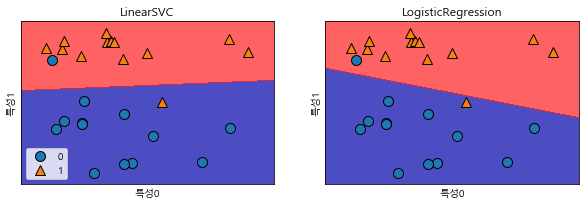

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn 
X,y = mglearn.datasets.make_forge() #학습을 위해 만들어진 데이터
fig, axes = plt.subplots(1,2, figsize=(10,3))
#axes = 1,2로 도화지가 두장 들어가있다.(1행2열)

#support vector classifier
#한번에 2개의 모델을 일시에 호출
#대회 -> 설명, 발표가 중요
#model shopping을 해야한다.
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    #LinearSVC() 그래프를 나누어졌다.
    #LogisticRegression() 
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.7) #분리선 출력, eps = 거리값
    #면을 채워서 경계선을 생성한다.
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__)) #clf.__class__인스턴스된 class이름(타입)을 알 수 있다.
    #clf.__class__.__name__ 각각의 이름
    ax.set_xlabel('특성0')
    ax.set_ylabel('특성1')
axes[0].legend()

In [112]:
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=10)
logreg = LogisticRegression().fit(X_train, Y_train)
print("훈련세트점수 {:.3f}".format(logreg.score(X_train,Y_train)))
print("테스트세트점수 {:.3f}".format(logreg.score(X_test, Y_test)))

훈련세트점수 0.958
테스트세트점수 0.930


C:\Users\gram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [183]:
#중고차 가격을 예측하는 데이터
#예측에 필요하지 않은 변수 제거
#학습데이터와 테스트 데이터로 분리
#학습데이터를 이용해 선형회귀 모델 학습
#모델결과확인
#예측성능평가 - 학습데이터 셀에대한 평가, 테스트 데이터에 대한 평가
#변수선택 - 모델에서 유의하기 않은 변수가 있다면 제거, 
    #제거후 모델학습 결과 / 예측성능 확인
         #- 상관계수가 높은 설명변수가 있다면 하나의 변수만 선택
    #제거후 모델힉습 결과 / 예측성능 확인
import pandas as pd
import statsmodels.api as sm
toyota = pd.read_csv('ToyotaCorolla.csv')
toyota = toyota.drop(['Id','Model','Fuel_Type'], axis=1)

train_data, test_data = train_test_split(toyota, test_size=0.3, random_state=20)

lm = sm.OLS(train_data['Price'], train_data.drop(['Price'], axis=1))
lm_trained = lm.fit()
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     315.7
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:04:07   Log-Likelihood:                -8427.2
No. Observations:                1005   AIC:                         1.692e+04
Df Residuals:                     973   BIC:                         1.708e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -112.9217      4.015    -28.128      0.000    -120.800    -105.043
Mfg_Month          -96.3288     10.511     -9.164      0.000    -116.956     -75.702
Mfg_Year             1.1354      0.823      1.379      0.168      -0.480       2.751
KM                  -0.0193      0.001    -15.744      0.000      -0.022      -0.017
HP                  19.7950      2.972      6.661      0.000      13.963      25.627
Met_Color         -135.9006     78.610     -1.729      0.084    -290.165      18.363
Automatic          510.9962    154.768      3.302      0.001     207.278     814.714
cc                  -0.0914      0.076     -1.205      0.229      -0.240       0.057
Doors              138.2103     40.363      3.424      0.001      59.001     217.420
Cylinders           -0.0325      0.002    -14.245      0.000      -0.037      -0.028
Gears              393.9550    202.446      1.946      0.052      -3.327     791.236
Quarterly_Tax        7.8122      1.359      5.748      0.000       5.145      10.479
Weight              10.0752      1.229      8.198      0.000       7.664      12.487
Mfr_Guarantee      257.6715     75.914      3.394      0.001     108.697     406.646
BOVAG_Guarantee    594.5788    133.807      4.444      0.000     331.995     857.163
Guarantee_Period    73.0972     13.442      5.438      0.000      46.718      99.476
ABS               -382.9438    128.306     -2.985      0.003    -634.733    -131.155
Airbag_1            -8.8375    250.427     -0.035      0.972    -500.276     482.601
Airbag_2            54.7735    130.683      0.419      0.675    -201.679     311.226
Airco              178.7745     92.585      1.931      0.054      -2.914     360.463
Automatic_airco   2434.7652    201.535     12.081      0.000    2039.272    2830.258
Boardcomputer     -182.1006    122.346     -1.488      0.137    -422.193      57.992
CD_Player          305.0976    103.887      2.937      0.003     101.229     508.967
Central_Lock       -83.3517    144.970     -0.575      0.565    -367.841     201.137
Powered_Windows    548.6710    145.663      3.767      0.000     262.822     834.520
Power_Steering    -316.4292    267.674     -1.182      0.237    -841.713     208.855
Radio              925.9109    784.154      1.181      0.238    -612.916    2464.738
Mistlamps         -267.6392    112.491     -2.379      0.018    -488.392     -46.887
Sport_Model        324.7510     89.914      3.612      0.000     148.304     501.198
Backseat_Divider   -54.6904    131.154     -0.417      0.677    -312.067     202.686
Metallic_Rim       195.4938     97.216      2.011      0.045       4.717     386.271
Radio_cassette   -1059.8522    785.396     -1.349      0.178   -2601.118     481.414
Tow_Bar           -129.5526     82.627     -1.568      0.117    -291.701      32.595
=======================

In [176]:
test_pred = lm_trained.predict(test_data.drop(['Price'],axis=1))
print(mean_squared_error(test_data['Price'], test_pred))
print(np.sqrt(mean_squared_error(test_data['Price'], test_pred)))
print(mean_absolute_error(test_data['Price'], test_pred))
print(mean_absolute_percentage_error(test_data['Price'],test_pred))

1576364.7389714436
1255.5336470885372
896.402669959208
8.569867402322402


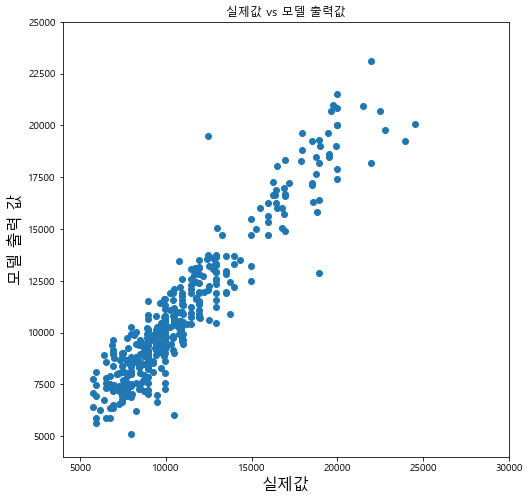

In [181]:
plt.figure(figsize=(8,8)) #표의 사이즈
plt.title('실제값 vs 모델 출력값')
plt.scatter(test_data['Price'],test_pred) #실제값, 피팅된값
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값',size=16)
plt.xlim(4000,30000)
plt.ylim(4000,25000)
plt.show()

In [ ]:
#t분포의 pvalue값
Mfg_Year - 0.168, Met_Color - 0.084, cc - 0.229, Gears-0.052 , Airbag_1 - 0.972, Airbag_2 - 0.675
Boardcomputer - 0.137, Central_Lock - 0.565, Power_Steering - 0.237, Radio - 0.238
Backseat_Divider - 0.677, Radio_cassette - 0.178, Tow_Bar - 0.117

In [126]:
toyota.corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.132092,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292


In [199]:
train_new = train_data.drop(['Airbag_1','Airbag_2','Cylinders','Backseat_Divider','Central_Lock'], axis=1)
test_new = test_data.drop(['Airbag_1','Airbag_2','Cylinders','Backseat_Divider','Central_Lock'], axis=1)
print(train_new.shape)
print(test_new.shape)

(1005, 29)
(431, 29)


In [200]:
lm_new = sm.OLS(train_new['Price'], train_new.drop(['Price'], axis=1))
lm_trained_new = lm_new.fit()
display(lm_trained_new.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     363.7
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:01:26   Log-Likelihood:                -8427.6
No. Observations:                1005   AIC:                         1.691e+04
Df Residuals:                     977   BIC:                         1.705e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -112.9239      3.998    -28.244      0.000    -120.770    -105.078
Mfg_Month          -96.0833     10.464     -9.182      0.000    -116.618     -75.549
Mfg_Year             1.1397      0.810      1.406      0.160      -0.451       2.730
KM                  -0.0194      0.001    -15.882      0.000      -0.022      -0.017
HP                  19.7424      2.952      6.687      0.000      13.949      25.536
Met_Color         -138.4932     77.939     -1.777      0.076    -291.440      14.454
Automatic          510.2671    154.163      3.310      0.001     207.739     812.796
cc                  -0.0891      0.075     -1.181      0.238      -0.237       0.059
Doors              137.2565     40.266      3.409      0.001      58.239     216.274
Gears              400.0693    201.477      1.986      0.047       4.692     795.447
Quarterly_Tax        7.8017      1.304      5.981      0.000       5.242      10.361
Weight              10.0412      1.205      8.330      0.000       7.676      12.407
Mfr_Guarantee      255.3800     75.110      3.400      0.001     107.985     402.775
BOVAG_Guarantee    586.9862    128.182      4.579      0.000     335.442     838.530
Guarantee_Period    73.7462     12.616      5.846      0.000      48.989      98.503
ABS               -353.5703    104.934     -3.369      0.001    -559.492    -147.648
Airco              176.9251     92.072      1.922      0.055      -3.756     357.606
Automatic_airco   2444.5726    197.550     12.374      0.000    2056.902    2832.243
Boardcomputer     -182.3233    119.548     -1.525      0.128    -416.923      52.277
CD_Player          304.7422    103.375      2.948      0.003     101.880     507.604
Powered_Windows    478.3991     91.201      5.246      0.000     299.428     657.371
Power_Steering    -344.3068    232.878     -1.478      0.140    -801.305     112.691
Radio              895.7586    776.000      1.154      0.249    -627.060    2418.578
Mistlamps         -275.4472    108.538     -2.538      0.011    -488.443     -62.452
Sport_Model        317.9575     83.983      3.786      0.000     153.149     482.766
Metallic_Rim       194.0588     96.997      2.001      0.046       3.713     384.405
Radio_cassette   -1034.7723    778.007     -1.330      0.184   -2561.529     491.984
Tow_Bar           -127.7236     82.140     -1.555      0.120    -288.914      33.467
==============================================================================
Omnibus:                       81.615   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.624
Skew:                          -0.248   Prob(JB):                     3.98e-75
Kurtosis:                       5.817   Cond. No.                     2.56e+06
=====================================================

In [201]:
test_pred_new = lm_trained_new.predict(test_new.drop(['Price'],axis=1))

print(mean_squared_error(test_new['Price'], test_pred_new))
print(np.sqrt(mean_squared_error(test_new['Price'], test_pred_new)))
print(mean_absolute_error(test_new['Price'], test_pred_new))
print(mean_absolute_percentage_error(test_new['Price'],test_pred_new))

1575832.0388533527
1255.321488246478
896.9905299042848
8.571579739513277


In [204]:
new_data = toyota.drop(['Airbag_1','Airbag_2','Cylinders','Backseat_Divider','Central_Lock'], axis=1)
new_data.corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Boardcomputer,CD_Player,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.601292,0.481374,0.356518,0.064275,-0.041887,0.222083,0.164121,0.108564,-0.043179,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.719449,-0.510895,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.040045,0.012857,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.017715,-0.016736,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023506,0.032576,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.720567,0.517008,0.280996,0.079676,-0.019607,0.133737,0.102080,0.036022,-0.018844,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.353862,-0.266826,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.013599,0.015770,0.084153
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.129715,0.102300,0.265593,0.048850,0.020998,0.210571,-0.006027,0.206784,0.019919,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.089886,0.198220,0.145147,0.086544,0.072756,0.023821,0.003779,0.053829,0.071530,0.148536
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.037069,-0.010967,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.078095,-0.014150,0.018786
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.009312,0.057787,0.055299,0.032933,-0.000361,0.017326,-0.035195,0.003236,-0.000470,0.002725
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.089606,0.094653,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.039555,-0.008265,0.102292


C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


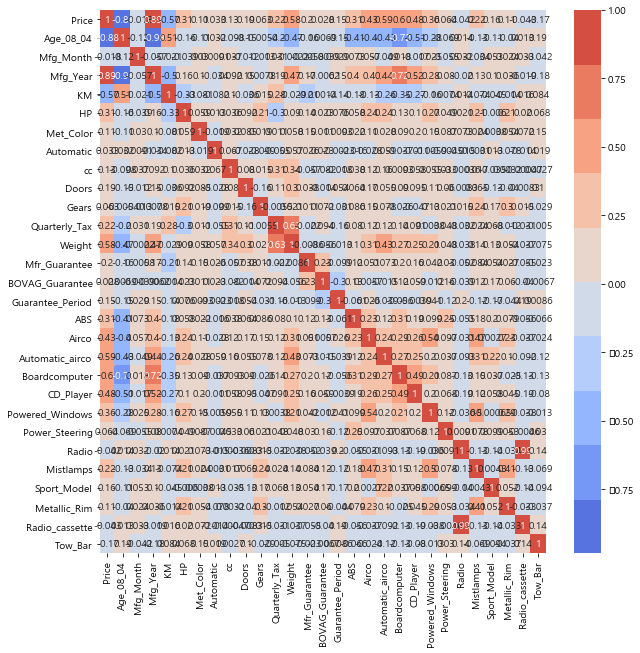

In [205]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(), cmap=sns.color_palette('coolwarm',10),annot=new_data.corr())

In [206]:
train_new2 = train_new.drop(['Radio_cassette','Boardcomputer'], axis=1) #다중공산성 제거 후 모델링
test_new2 = test_new.drop(['Radio_cassette','Boardcomputer'], axis=1)

lm_new2 = sm.OLS(train_new2['Price'], train_new2.drop(['Price'], axis=1))
lm_trained_new2 = lm_new2.fit()
display(lm_trained_new2.summary())
test_pred_new2 = lm_trained_new2.predict(test_new2.drop(['Price'],axis=1))

print(mean_squared_error(test_new2['Price'], test_pred_new2))
print(np.sqrt(mean_squared_error(test_new2['Price'], test_pred_new2)))
print(mean_absolute_error(test_new2['Price'], test_pred_new2))
print(mean_absolute_percentage_error(test_new2['Price'],test_pred_new2))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     391.8
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:11:04   Log-Likelihood:                -8429.7
No. Observations:                1005   AIC:                         1.691e+04
Df Residuals:                     979   BIC:                         1.704e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -109.1729      3.281    -33.270      0.000    -115.612    -102.734
Mfg_Month          -94.2542     10.427     -9.039      0.000    -114.716     -73.792
Mfg_Year             0.9037      0.800      1.130      0.259      -0.665       2.473
KM                  -0.0196      0.001    -16.138      0.000      -0.022      -0.017
HP                  19.2040      2.940      6.532      0.000      13.434      24.974
Met_Color         -142.1789     77.979     -1.823      0.069    -295.204      10.846
Automatic          513.2994    154.281      3.327      0.001     210.540     816.059
cc                  -0.0803      0.075     -1.066      0.287      -0.228       0.068
Doors              136.6476     40.305      3.390      0.001      57.554     215.742
Gears              416.3997    201.394      2.068      0.039      21.186     811.613
Quarterly_Tax        7.7238      1.304      5.921      0.000       5.164      10.284
Weight              10.1749      1.204      8.449      0.000       7.812      12.538
Mfr_Guarantee      248.5262     75.048      3.312      0.001     101.253     395.799
BOVAG_Guarantee    572.0933    128.082      4.467      0.000     320.746     823.441
Guarantee_Period    77.1841     12.445      6.202      0.000      52.762     101.606
ABS               -351.7991    104.912     -3.353      0.001    -557.678    -145.920
Airco              189.8903     91.942      2.065      0.039       9.464     370.317
Automatic_airco   2463.1686    197.299     12.484      0.000    2075.992    2850.345
CD_Player          295.5227    102.223      2.891      0.004      94.921     496.124
Powered_Windows    467.8995     91.130      5.134      0.000     289.067     646.732
Power_Steering    -308.8596    230.215     -1.342      0.180    -760.630     142.911
Radio             -108.9227    106.175     -1.026      0.305    -317.280      99.435
Mistlamps         -282.8374    107.986     -2.619      0.009    -494.749     -70.926
Sport_Model        329.4574     83.768      3.933      0.000     165.073     493.842
Metallic_Rim       211.6878     96.146      2.202      0.028      23.012     400.364
Tow_Bar           -126.4593     82.191     -1.539      0.124    -287.751      34.832
==============================================================================
Omnibus:                       81.955   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.761
Skew:                          -0.244   Prob(JB):                     1.85e-76
Kurtosis:                       5.844   Cond. No.                     5.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+

1590446.3114628308
1261.1289828811448
900.0535616501899
8.592172504695625
